In [5]:
import numpy as np
import pandas as pd
import ast

In [276]:
def literal_eval(x):
    if pd.isna(x):
        return dict()
    raw_dict = ast.literal_eval(x)
    for key in raw_dict:
        raw_dict[key] = ast.literal_eval(raw_dict[key])
    return raw_dict
        
def proccess_df(df):
    df['loc'] = df['loc'].apply(lambda x: ast.literal_eval(x))
    df['attributes'] = df['attributes'].apply(literal_eval)
    df['hours'] = df['hours'].apply(lambda x: ast.literal_eval(x) if not pd.isna(x) else dict())
    df = df.set_index('business_id')
    return df

In [7]:
df = pd.read_csv('dados/X_trainToronto.csv').set_index('business_id')
proccess_df(df)

df.head(10)

,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours,loc,destaque
business_id,,,,,,,,,,,,
vHzWmPWHN4J1hRR3W3AMQg,Salt Wine Bar,225 Ossington Ave,M6J 2Z8,43.648977,-79.420495,99,1,"{'Ambience': {'romantic': False, 'intimate': F...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...","{'type': 'Point', 'coordinates': [-79.4204946,...",0
15to24Q-otAHmto7FzsWRg,William's Beauty Supplies,2229 Dundas Street W,M6R 1X6,43.654002,-79.452189,3,1,"{'BusinessParking': {'garage': False, 'street'...","Beauty & Spas, Hair Salons, Barbers, Shopping,...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...","{'type': 'Point', 'coordinates': [-79.4521893,...",0
8aqKdf4G4AAir8k_Kdslvg,Integra Health Centre,1320-130 King Street W,M5X 1C8,43.648493,-79.383214,18,1,"{'ByAppointmentOnly': True, 'AcceptsInsurance'...","Health & Medical, Medical Centers","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.3832139,...",0
uxU1vr5AhhkTQ83X0bpeyg,North York General Hospital,555 Finch Avenue W,M2R 1N5,43.772453,-79.448136,3,0,{'ByAppointmentOnly': False},"Health & Medical, Hospitals, Medical Centers",{},"{'type': 'Point', 'coordinates': [-79.4481361,...",0
f702hTJoqdR34Jn23C7d1A,Dr Jamie's Bike Clinic,2741 Dundas St W,M6P,43.665082,-79.460800,3,1,{'RestaurantsPriceRange2': 3},"Automotive, Bikes, Shopping, Auto Repair, Spor...",{},"{'type': 'Point', 'coordinates': [-79.4607999,...",0
gUnfAh1I1gwAtHAf45x0hA,Becker's Dressroom,269 Danforth Ave,M4K 1N2,43.676905,-79.354667,6,0,"{'ByAppointmentOnly': True, 'RestaurantsPriceR...","Bridal, Shopping",{},"{'type': 'Point', 'coordinates': [-79.3546674,...",0
ANAPBJgCwEMg4ruYcQ-Law,Ravi Soups,322 Adelaide Street W,M5V 1R1,43.647585,-79.392032,56,1,"{'Caters': False, 'RestaurantsTakeOut': True, ...","Soup, Sandwiches, Restaurants, Vegetarian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","{'type': 'Point', 'coordinates': [-79.3920316,...",0
McjhldIPMdoCW1rHr1bj8g,Yummy Tummy's Bar & Grill,1962 Eginton Avenue W,M6E 4E6,43.694983,-79.454195,3,1,{'BikeParking': True},"Nightlife, American (Traditional), Bars, Resta...",{},"{'type': 'Point', 'coordinates': [-79.45419540...",0
5sKb4h7R5gdhePSflPD0Tw,Kiku Japanese Cuisine,808 York Mills Road,M3B 1X8,43.754118,-79.357963,97,1,"{'WheelchairAccessible': True, 'RestaurantsRes...","Caterers, Event Planning & Services, Food, Res...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...","{'type': 'Point', 'coordinates': [-79.3579634,...",0


Todos os tipos de atributos

In [40]:
unique_attributes = set()
attributes = df['attributes'].iteritems()
for index, item_dict in attributes:
    for key in item_dict:
        if type(item_dict[key]) is dict:
            for key2 in item_dict[key]:
                unique_attributes.add(f'{key}.{key2}')
        else:
            unique_attributes.add(key)
    
unique_attributes

{'AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'Ambience.casual',
 'Ambience.classy',
 'Ambience.divey',
 'Ambience.hipster',
 'Ambience.intimate',
 'Ambience.romantic',
 'Ambience.touristy',
 'Ambience.trendy',
 'Ambience.upscale',
 'BestNights.friday',
 'BestNights.monday',
 'BestNights.saturday',
 'BestNights.sunday',
 'BestNights.thursday',
 'BestNights.tuesday',
 'BestNights.wednesday',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'BusinessParking.garage',
 'BusinessParking.lot',
 'BusinessParking.street',
 'BusinessParking.valet',
 'BusinessParking.validated',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'DietaryRestrictions.dairy-free',
 'DietaryRestrictions.gluten-free',
 'DietaryRestrictions.halal',
 'DietaryRestrictions.kosher',
 'DietaryRestrictions.soy-free',
 'DietaryRestrictions.vegan',
 'DietaryRestrictions.vegetarian',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'G

## Abordagem mais simples
Olhar o número de reviews e fazer uma análise com base na quantidade de reviews e depois fazer uma análise de sentimento na review

In [ ]:
df_reviews_count = df_reviews.groupby('business_id').count().iloc[:,0].sort_values()
df_reviews_count

business_id
qPdVXk04VlKdBVQstuh6Qw       3
upp4ENhXQq3HlfXzZZoaQg       3
upqOQni0VSWAj2a8HyrmyQ       3
8UAl0mQiC9urtue9ViOepg       3
uq1HD5eJok2mI306kV3LJw       3
                          ... 
N93EYZy9R0sdlEvubu94ig    1078
iGEvDk6hsizigmXhDKs2Vg    1183
RtUvSWO_UZ8V3Wpj0n077w    1425
aLcFhMe6DDJ430zelCpd2A    1467
r_BrIgzYcwo1NAuG9dLbpg    2177
Name: user_id, Length: 17582, dtype: int64

Dados com o processamento da análise de sentimento. O label é a quantidade de estrelas que daria ao estabelecimento de 1 a 5 e o score é a confiança.
https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

In [277]:
def make_df_score(df, df_reviews):
    weights = {
        'useful': 1,
        'cool': 0.75,
        'funny': 0.5
    }
    df_reviews['weight'] = df_reviews.apply(lambda row: 1 + row['useful'] * weights['useful'] + row['cool'] * weights['cool'] + row['funny'] * weights['funny'], axis=1)
    def wavg_label(group):
        d = group['label']
        w = group['weight']
        return (d * w).sum() / w.sum()
    
    def wavg_score(group):
        d = group['score']
        w = group['weight']
        return (d * w).sum() / w.sum()
        
    df_reviews_label_grouped = df_reviews.groupby(['business_id']).apply(wavg_label, include_groups=False)
    df_reviews_score_grouped = df_reviews.groupby(['business_id']).apply(wavg_score, include_groups=False)
    df_reviews_scores = pd.DataFrame(df_reviews_label_grouped, columns=['stars']).join(pd.DataFrame(df_reviews_score_grouped, columns=['score']))
    df_score = df.join(df_reviews_scores)
    df_score['stars'] = (df_score['stars']-df_score['stars'].min())/(df_score['stars'].max()-df_score['stars'].min())
    return df_score

df_score = make_df_score(proccess_df(pd.read_csv('dados/X_trainToronto.csv')), pd.read_csv('dados_produzidos/reviewsTrainTorontoSentiment.csv'))
df_score

,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours,loc,destaque,stars,score
business_id,,,,,,,,,,,,,,
vHzWmPWHN4J1hRR3W3AMQg,Salt Wine Bar,225 Ossington Ave,M6J 2Z8,43.648977,-79.420495,99,1,"{'Ambience': {'romantic': False, 'intimate': F...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...","{'type': 'Point', 'coordinates': [-79.4204946,...",0,0.582949,0.532271
15to24Q-otAHmto7FzsWRg,William's Beauty Supplies,2229 Dundas Street W,M6R 1X6,43.654002,-79.452189,3,1,"{'BusinessParking': {'garage': False, 'street'...","Beauty & Spas, Hair Salons, Barbers, Shopping,...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...","{'type': 'Point', 'coordinates': [-79.4521893,...",0,0.791667,0.577041
8aqKdf4G4AAir8k_Kdslvg,Integra Health Centre,1320-130 King Street W,M5X 1C8,43.648493,-79.383214,18,1,"{'ByAppointmentOnly': True, 'AcceptsInsurance'...","Health & Medical, Medical Centers","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.3832139,...",0,0.340136,0.706820
uxU1vr5AhhkTQ83X0bpeyg,North York General Hospital,555 Finch Avenue W,M2R 1N5,43.772453,-79.448136,3,0,{'ByAppointmentOnly': False},"Health & Medical, Hospitals, Medical Centers",{},"{'type': 'Point', 'coordinates': [-79.4481361,...",0,0.666667,0.400056
f702hTJoqdR34Jn23C7d1A,Dr Jamie's Bike Clinic,2741 Dundas St W,M6P,43.665082,-79.460800,3,1,{'RestaurantsPriceRange2': 3},"Automotive, Bikes, Shopping, Auto Repair, Spor...",{},"{'type': 'Point', 'coordinates': [-79.4607999,...",0,0.006757,0.511156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zp5xil8pC6Bm-fFOWIbh0Q,Burrito Zone,2030 Ellesmere Road,M1H 2V6,43.776237,-79.235318,16,1,"{'Caters': True, 'BikeParking': False, 'WiFi':...","Restaurants, Halal, Mexican","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...","{'type': 'Point', 'coordinates': [-79.23531845...",0,0.320359,0.567692
o2811xZ0ufRi7WcsqWiGzw,Starbucks,50 Bloor Street W,M4W 3L8,43.670098,-79.388198,4,1,"{'RestaurantsPriceRange2': 2, 'BikeParking': F...","Food, Coffee & Tea",{},"{'type': 'Point', 'coordinates': [-79.38819842...",0,0.772727,0.757226
v9T9m_TbpLuaC2Kud5UbLA,Caruso Fine Tailors,830 Danforth Avenue,M4J 1L6,43.679862,-79.340900,8,1,"{'RestaurantsPriceRange2': 2, 'BikeParking': T...","Sewing & Alterations, Shopping, Local Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...","{'type': 'Point', 'coordinates': [-79.3408995,...",0,0.568000,0.657578


In [278]:
df_score[['stars', 'destaque']].corr()

,stars,destaque
stars,1.000000,0.211887
destaque,0.211887,1.000000


In [200]:
from sklearn.model_selection import train_test_split
df_X = df_score[['stars', 'score', 'review_count']]
df_y = df_score['destaque']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=892)
display(X_train)
display(y_train)

,stars,score,review_count
business_id,,,
TNRJvG_R1njEdid-UdCjBQ,0.733414,0.630973,52
gx-mrr0TVgKVwPCkJLEh2w,0.690909,0.647913,16
K-VHMhPh7SEJjb9stWljXg,0.760000,0.662004,5
2cYTy7YlmlS9uuuQI1Trzg,0.474771,0.547214,32
cepfJZIv0iLj1fDs8LdYZg,0.630173,0.559500,156
...,...,...,...
7fRD_mAn0csnDNgV5arPpw,0.796875,0.741840,8
dKON2mm3YfMHgAV3I_TepQ,0.490000,0.754259,3
Yat2ijOqycXw41obPs8l1g,0.871951,0.603064,5


business_id
TNRJvG_R1njEdid-UdCjBQ    0
gx-mrr0TVgKVwPCkJLEh2w    0
K-VHMhPh7SEJjb9stWljXg    0
2cYTy7YlmlS9uuuQI1Trzg    0
cepfJZIv0iLj1fDs8LdYZg    0
                         ..
7fRD_mAn0csnDNgV5arPpw    0
dKON2mm3YfMHgAV3I_TepQ    0
Yat2ijOqycXw41obPs8l1g    0
IcyKofkD1rN-yY_RT4pxAg    0
fXFh4eCXENF4V_eLSDrtXg    0
Name: destaque, Length: 13186, dtype: int64

In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure(y_test, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    
    # Calculate recall (sensitivity)
    recall = recall_score(y_test, y_pred)
    print("Recall (Sensitivity):", recall)
    
    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

## Aleatório

In [169]:
rng = np.random.default_rng(123)
y_test_zeros = np.array(np.zeros(y_test.value_counts()[0]))
y_test_ones = np.full(shape=y_test.value_counts()[1],fill_value=1)
baseline = np.append(y_test_zeros, y_test_ones)
rng.shuffle(baseline)
measure(y_test, baseline)

Accuracy: 0.8885350318471338
Precision: 0.0648854961832061
Recall (Sensitivity): 0.0648854961832061
F1-Score: 0.0648854961832061


## Regressão linear

In [171]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.05410365921077598

In [178]:
threshold = 0.12
y_pred = [1 if x > threshold else 0 for x in reg.predict(X_test)]
measure(y_test, y_pred)

Accuracy: 0.8491810737033667
Precision: 0.15843270868824533
Recall (Sensitivity): 0.3549618320610687
F1-Score: 0.21908127208480566


## Regressão SVM

In [199]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=2.0, epsilon=0.2))

regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=2.0, epsilon=0.2))])

In [198]:
threshold = 0.25
y_pred = [1 if x > threshold else 0 for x in regr.predict(X_test)]
measure(y_test, y_pred)

Accuracy: 0.9429026387625113
Precision: 0.5217391304347826
Recall (Sensitivity): 0.5038167938931297
F1-Score: 0.512621359223301


## Regressão logística

In [218]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=3).fit(X_train, y_train)
clf.score(X_train, y_train)

0.9394054300015168

In [221]:
pd.Series(clf.decision_function(X_test)).value_counts()

-2.599462    1
-3.882522    1
-2.766170    1
-3.129688    1
-2.525782    1
            ..
-1.808737    1
-3.236339    1
-1.990162    1
-2.231767    1
-6.162771    1
Name: count, Length: 4396, dtype: int64

In [233]:
threshold = -2.2
y_pred = [1 if x > threshold else 0 for x in clf.decision_function(X_test)]
measure(y_test, y_pred)

Accuracy: 0.8061874431301183
Precision: 0.16928251121076232
Recall (Sensitivity): 0.5763358778625954
F1-Score: 0.2616984402079723


## Árvore de decisão

In [250]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1, max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
measure(y_test, y_pred)

Accuracy: 0.9535941765241128
Precision: 0.6394230769230769
Recall (Sensitivity): 0.5076335877862596
F1-Score: 0.5659574468085107


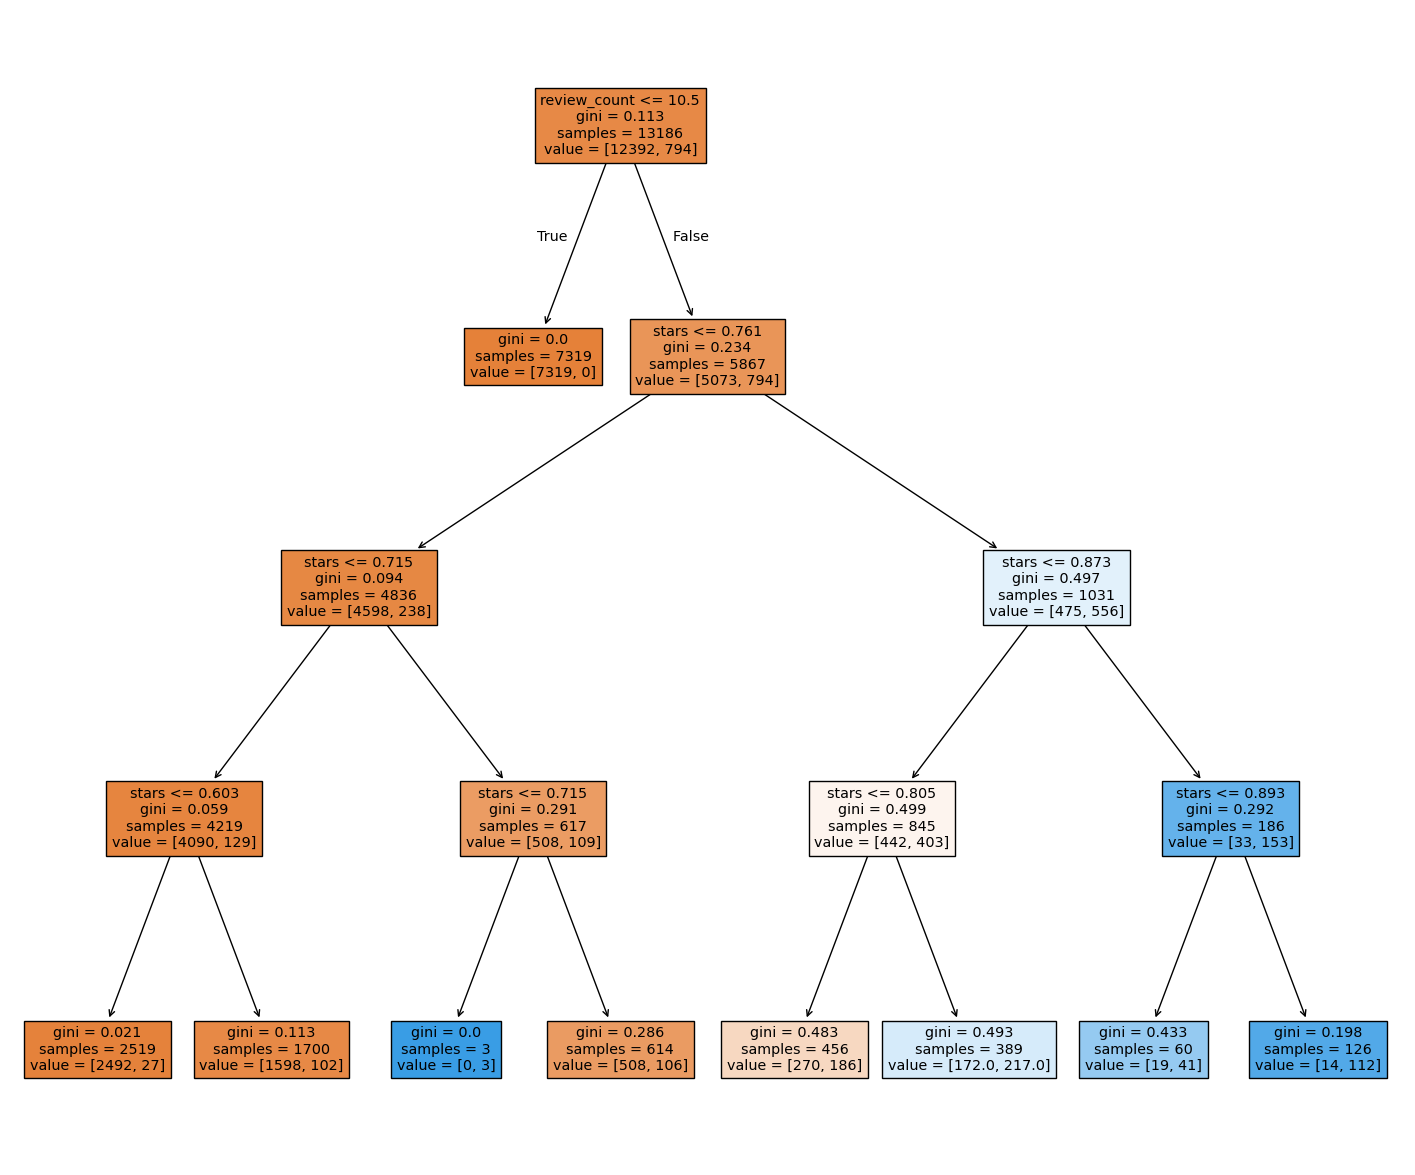

In [251]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

In [264]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
measure(y_test, y_pred)

Accuracy: 0.9501819836214741
Precision: 0.6102564102564103
Recall (Sensitivity): 0.4541984732824427
F1-Score: 0.5207877461706784


## Árvore de decisão venceu
Irei fazer a submissão da árvore de decisão

In [284]:
df_score_submission = make_df_score(proccess_df(pd.read_csv('dados/X_testToronto.csv')), pd.read_csv('dados_produzidos/reviewsTestTorontoSentiment.csv'))
X_submission = df_score_submission[['stars', 'score', 'review_count']]
df_score_submission

,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours,loc,stars,score
business_id,,,,,,,,,,,,,
0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': False, 'RestaurantsPriceRan...","Restaurants, Chicken Shop, Fast Food",{},"{'type': 'Point', 'coordinates': [-79.326248, ...",0.562500,0.451755
h6NYKqweTmcBz3z6UeUJ8w,Rosedale Radiology and Ultrasound,600 Sherbourne Street,M4X 1W4,43.671682,-79.376870,6,1,{},"Diagnostic Imaging, Diagnostic Services, Docto...",{},"{'type': 'Point', 'coordinates': [-79.3768696,...",0.364130,0.435993
AycqWXrDVlbRfJE-kA5MMw,Savour Toronto,NaN,NaN,43.653226,-79.383184,8,1,{'RestaurantsPriceRange2': 3},"Party & Event Planning, Hotels & Travel, Local...",{},"{'type': 'Point', 'coordinates': [-79.3831843,...",0.936047,0.636648
EVC1vn1KQ2uETnTbDWXc5w,Cadillac Jenkins,930 Queen Street W,M6J 1G6,43.645042,-79.416121,13,0,"{'RestaurantsReservations': False, 'GoodForKid...","Caribbean, Tapas/Small Plates, Restaurants","{'Tuesday': '17:0-2:0', 'Wednesday': '17:0-2:0...","{'type': 'Point', 'coordinates': [-79.4161208,...",0.678161,0.553045
fdTDe7XIXfhftmgNfR_-3g,Laura Secord,"Toronto Eaton Centre, 220 Yonge Street",M5B 2H1,43.654067,-79.380082,3,0,"{'BusinessParking': {'garage': False, 'street'...","Specialty Food, Chocolatiers & Shops, Food",{},"{'type': 'Point', 'coordinates': [-79.3800815,...",0.500000,0.552572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4na5CBQqyWq896-8qOpQ9g,Lucky 13 Tattoo Shop,533 Bloor Street W,M5S 1Y5,43.665395,-79.409607,4,0,"{'BusinessParking': {'garage': False, 'street'...","Beauty & Spas, Piercing, Tattoo",{},"{'type': 'Point', 'coordinates': [-79.4096073,...",0.543103,0.505420
DwG7_vYztZP-AMXEIvGgFA,Christine Cs Shortbread,1 Yonge St,M5E,43.642925,-79.374186,3,1,"{'BusinessParking': {'garage': False, 'street'...","Food, Bakeries",{},"{'type': 'Point', 'coordinates': [-79.3741862,...",1.000000,0.627303
wYZoSBvIbJWvDl-ruZwJ7Q,Harbourfront Centre,235 Queens Quay W,M5J 2G8,43.639069,-79.382896,62,1,{'GoodForKids': True},"Arts & Entertainment, Venues & Event Spaces, P...","{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'...","{'type': 'Point', 'coordinates': [-79.382896, ...",0.735101,0.591542


In [286]:
clf = DecisionTreeClassifier(random_state=1, max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_submission)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [292]:
pd.DataFrame({'business_id':X_submission.index, 'destaque':y_pred }).to_csv('predicoes/decisionTreeOnlySentimentAnalisis.csv', columns=['business_id','destaque'],index=False)